<a href="https://colab.research.google.com/github/lexiaylin/laboratorio-/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

In [2]:
using_colab = False

In [3]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

    !mkdir images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [5]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

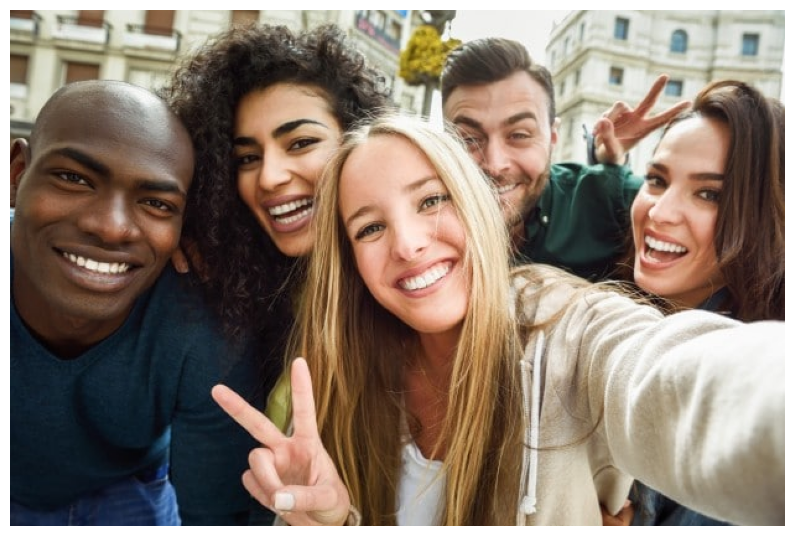

In [6]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

def load_image_from_url(url):
    try:
        # Descargar la imagen desde la URL
        resp = urllib.request.urlopen(url)
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if image is None:
            raise ValueError("La URL no es una imagen válida o no se pudo decodificar.")
        # Convertir BGR a RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    except Exception as e:
        print(f"Error al cargar la imagen: {e}")
        return None

# Ejemplo de uso con una URL de imagen REAL:
image_url = "https://psicologiamonzo.com/wp-content/uploads/2019/03/multiracial-grupo-joven-gente-toma-selfie_1139-1032.jpg"  # URL directa a imagen
image = load_image_from_url(image_url)

if image is not None:
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
else:
    print("No se pudo cargar la imagen. Verifica la URL.")

In [16]:
import sys
import os

# 1. Verificar si estamos en Google Colab
if 'google.colab' in sys.modules:
    !pip install git+https://github.com/facebookresearch/segment-anything.git
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
    using_colab = True
else:
    using_colab = False

# 2. Configuración de rutas para entornos locales
if not using_colab:
    # Clonar repositorio si no existe
    if not os.path.exists("segment-anything"):
        !git clone https://github.com/facebookresearch/segment-anything

    # Añadir ruta correcta
    sys.path.append(os.path.abspath("segment-anything"))

    # Descargar modelo si no existe
    if not os.path.exists("sam_vit_h_4b8939.pth"):
        !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# 3. Importación con manejo de errores
try:
    from segment_anything import sam_model_registry, SamPredictor
except ImportError as e:
    raise ImportError(
        "No se pudo importar segment_anything. Soluciones:\n"
        "1. Para Colab: Reinicia el runtime después de instalar\n"
        "2. Local: Verifica que segment-anything esté clonado\n"
        f"Error original: {e}"
    )

# 4. Carga del modelo (tu código original)
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

try:
    sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
    sam.to(device=device)
    predictor = SamPredictor(sam)
    print(f"✔ Modelo cargado correctamente en {device}")
except Exception as e:
    raise RuntimeError(f"Error al cargar el modelo: {e}")

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-d8ep3o4d
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-d8ep3o4d
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=70139edb386aa858e82fa578176751837f522e272f91c34df61a56e4a208c2af
  Stored in directory: /tmp/pip-ephem-wheel-cache-gfyygim7/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything
--2025-06-04 10:51:26--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.121, 108.157.254.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|1

In [17]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [18]:
predictor.set_image(image)

In [23]:
input_point = np.array([[350, 200]])
input_label = np.array([1])

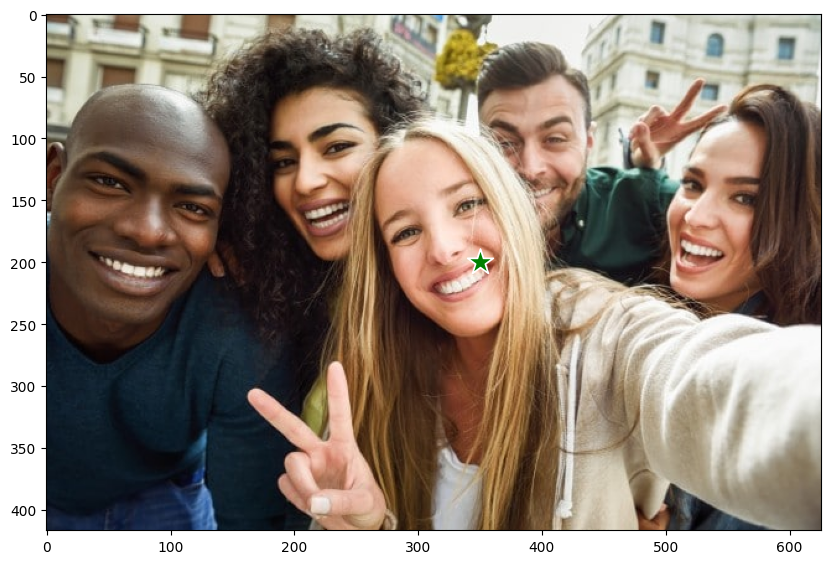

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [25]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [26]:
masks.shape  # (number_of_masks) x H x W

(3, 417, 626)

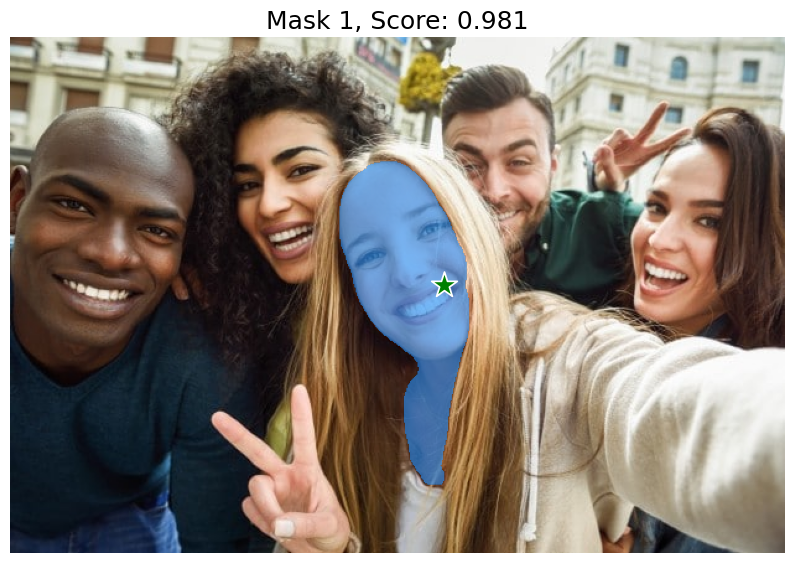

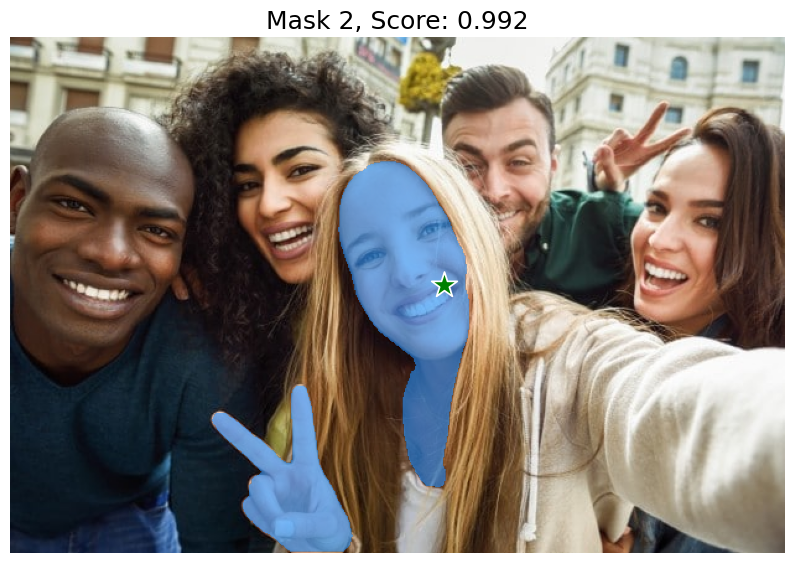

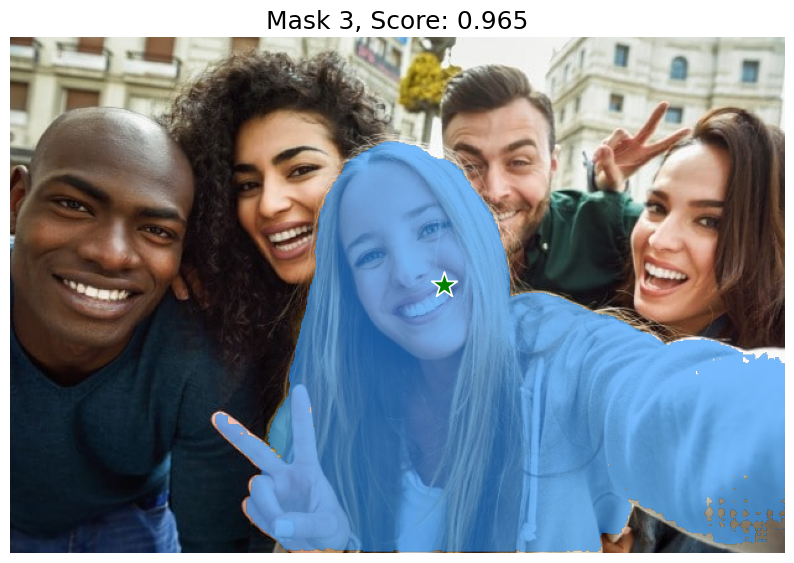

In [27]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()


In [32]:
input_point = np.array([[500, 375], [1125, 625]])
input_label = np.array([1, 1])

mask_input = logits[np.argmax(scores), :, :]  # Choose the model's best mask

In [33]:
masks.shape

(1, 417, 626)

In [34]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)

In [35]:
input_point = np.array([[500, 375], [1125, 625]])
input_label = np.array([1, 0])

mask_input = logits[np.argmax(scores), :, :]  # Choose the model's best mask

In [36]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)

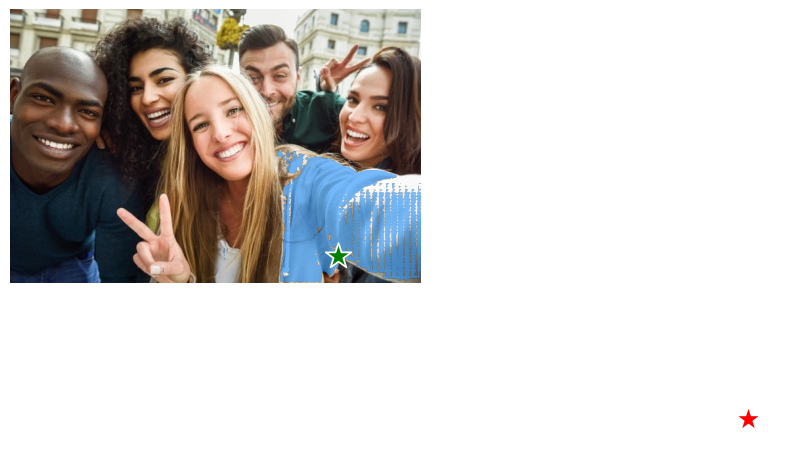

In [37]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

In [38]:
input_box = np.array([425, 600, 700, 875])

In [39]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

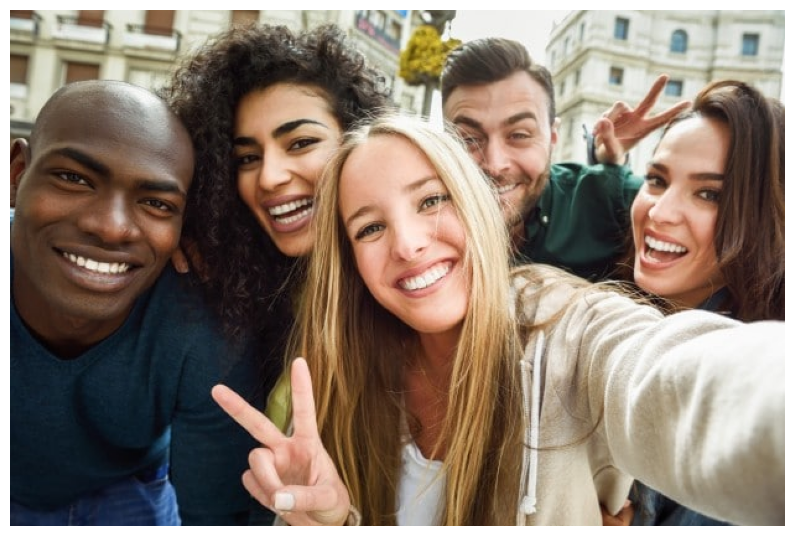

In [40]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [41]:
input_box = np.array([425, 600, 700, 875])
input_point = np.array([[575, 750]])
input_label = np.array([0])

In [42]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=False,
)

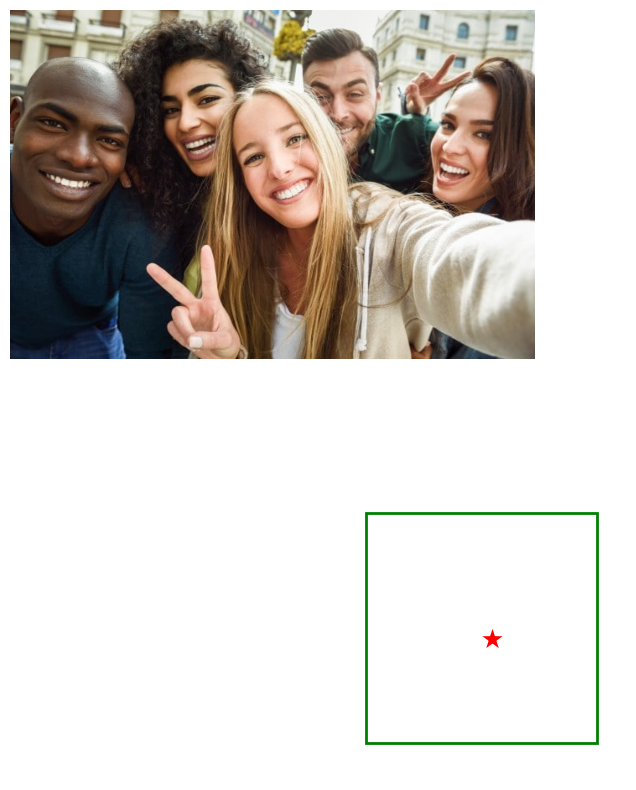

In [43]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

In [44]:
input_boxes = torch.tensor([
    [75, 275, 1725, 850],
    [425, 600, 700, 875],
    [1375, 550, 1650, 800],
    [1240, 675, 1400, 750],
], device=predictor.device)

In [45]:
transformed_boxes = predictor.transform.apply_boxes_torch(input_boxes, image.shape[:2])
masks, _, _ = predictor.predict_torch(
    point_coords=None,
    point_labels=None,
    boxes=transformed_boxes,
    multimask_output=False,
)

In [46]:
masks.shape  # (batch_size) x (num_predicted_masks_per_input) x H x W

torch.Size([4, 1, 417, 626])

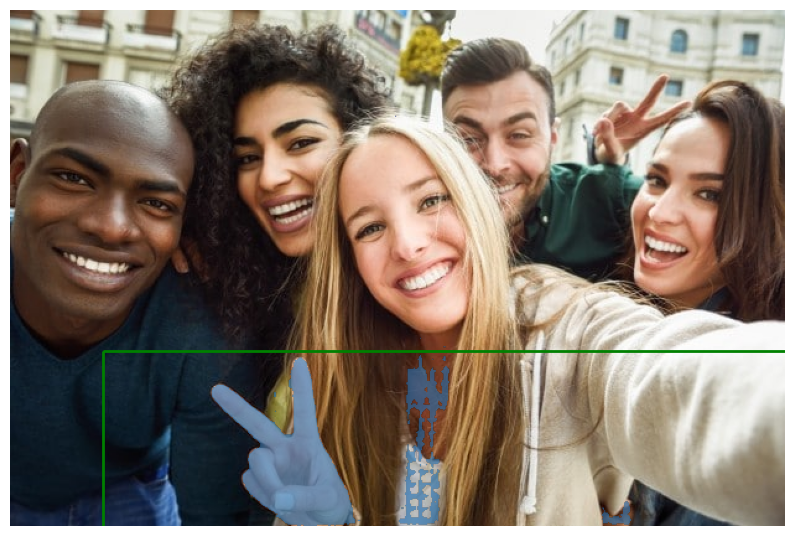

In [47]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in masks:
    show_mask(mask.cpu().numpy(), plt.gca(), random_color=True)
for box in input_boxes:
    show_box(box.cpu().numpy(), plt.gca())
plt.axis('off')
plt.show()

In [55]:
import sys
import os
import torch
import cv2
import numpy as np

# 1. Verificar si estamos en Google Colab
if 'google.colab' in sys.modules:
    !pip install git+https://github.com/facebookresearch/segment-anything.git
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
    using_colab = True
else:
    using_colab = False

# 2. Configuración de rutas para entornos locales y descarga de archivos
# Ensure the 'images' directory exists
if not os.path.exists("images"):
    !mkdir images

# Download truck.jpg if it doesn't exist
if not os.path.exists("images/truck.jpg"):
    !wget -P images https://psicologiamonzo.com/wp-content/uploads/2019/03/multiracial-grupo-joven-gente-toma-selfie_1139-1032.jpg

# Download groceries.jpg if it doesn't exist
if not os.path.exists("images/groceries.jpg"):
    !wget -P images https://psicologiamonzo.com/wp-content/uploads/2019/03/multiracial-grupo-joven-gente-toma-selfie_1139-1032.jpg

# Download model checkpoint if it doesn't exist
if not os.path.exists("sam_vit_h_4b8939.pth"):
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

if not using_colab:
    # Clonar repositorio si no existe (assuming it's needed for imports if not installed)
    if not os.path.exists("segment-anything"):
        !git clone https://github.com/facebookresearch/segment-anything

    # Añadir ruta correcta (only necessary if git clone is used and not pip install)
    # Consider installing via pip locally for better dependency management
    try:
        from segment_anything import sam_model_registry, SamPredictor
    except ImportError:
         print("Attempting to add segment-anything to sys.path...")
         sys.path.append(os.path.abspath("segment-anything"))


# 3. Importación con manejo de errores
try:
    from segment_anything import sam_model_registry, SamPredictor
except ImportError as e:
    raise ImportError(
        "No se pudo importar segment_anything. Soluciones:\n"
        "1. Para Colab: Reinicia el runtime después de instalar\n"
        "2. Local: Verifica que segment-anything esté clonado o instalado via pip\n"
        f"Error original: {e}"
    )

# 4. Carga del modelo (tu código original)
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

try:
    sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
    sam.to(device=device)
    predictor = SamPredictor(sam)
    print(f"✔ Modelo cargado correctamente en {device}")
except Exception as e:
    raise RuntimeError(f"Error al cargar el modelo: {e}")

# Rest of the code from ipython-input-48-b2d44ee6bc77
image1 = image  # truck.jpg from above
image1_boxes = torch.tensor([
    [75, 275, 1725, 850],
    [425, 600, 700, 875],
    [1375, 550, 1650, 800],
    [1240, 675, 1400, 750],
], device=sam.device)

# Ensure image2 is loaded correctly after confirming file existence
image2_path = 'images/groceries.jpg'
image2 = cv2.imread(image2_path)

if image2 is None:
    raise FileNotFoundError(f"Failed to load image from {image2_path}. Please ensure the file exists.")

image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) # This should now work as image2 is not None
image2_boxes = torch.tensor([
    [450, 170, 520, 350],
    [350, 190, 450, 350],
    [500, 170, 580, 350],
    [580, 170, 640, 350],
], device=sam.device)

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ewvvzr27
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ewvvzr27
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
--2025-06-04 11:05:29--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.121, 108.157.254.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.2’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   147MB/s    in 23s     

2025-06-04 11:05:52 (107 MB/s) - ‘sam_vit_h_4b8939.pth.2’ saved [2564550879/256455

In [56]:
from segment_anything.utils.transforms import ResizeLongestSide
resize_transform = ResizeLongestSide(sam.image_encoder.img_size)

def prepare_image(image, transform, device):
    image = transform.apply_image(image)
    image = torch.as_tensor(image, device=device.device)
    return image.permute(2, 0, 1).contiguous()

In [57]:
batched_input = [
     {
         'image': prepare_image(image1, resize_transform, sam),
         'boxes': resize_transform.apply_boxes_torch(image1_boxes, image1.shape[:2]),
         'original_size': image1.shape[:2]
     },
     {
         'image': prepare_image(image2, resize_transform, sam),
         'boxes': resize_transform.apply_boxes_torch(image2_boxes, image2.shape[:2]),
         'original_size': image2.shape[:2]
     }
]

In [58]:
batched_output = sam(batched_input, multimask_output=False)

In [59]:
batched_output[0].keys()

dict_keys(['masks', 'iou_predictions', 'low_res_logits'])

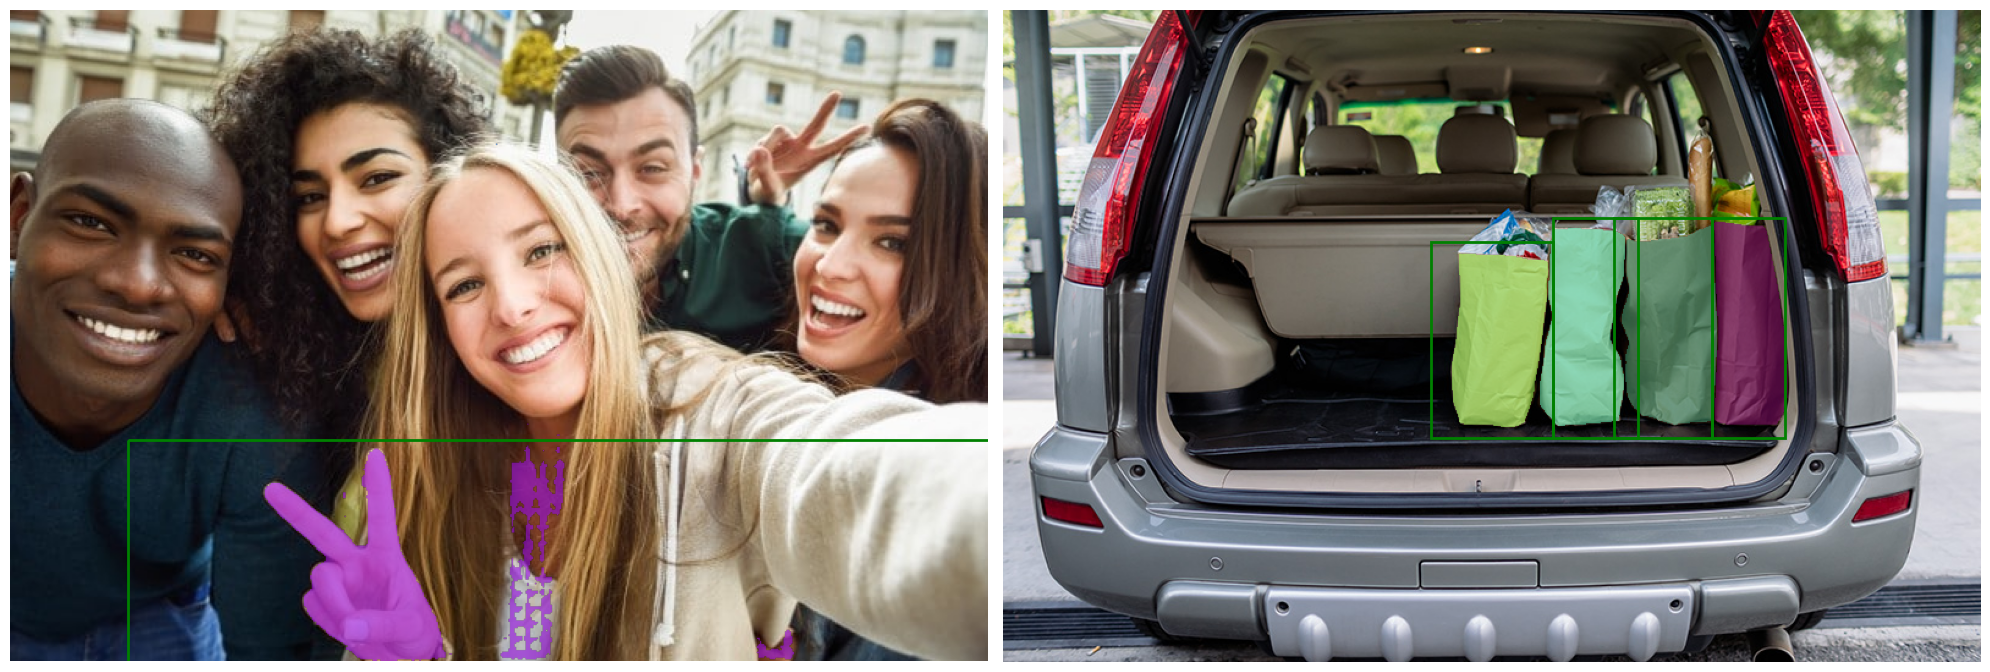

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(image1)
for mask in batched_output[0]['masks']:
    show_mask(mask.cpu().numpy(), ax[0], random_color=True)
for box in image1_boxes:
    show_box(box.cpu().numpy(), ax[0])
ax[0].axis('off')

ax[1].imshow(image2)
for mask in batched_output[1]['masks']:
    show_mask(mask.cpu().numpy(), ax[1], random_color=True)
for box in image2_boxes:
    show_box(box.cpu().numpy(), ax[1])
ax[1].axis('off')

plt.tight_layout()
plt.show()